# Question 1 BFS AND DFS

## Convert the travel_ethiopia map figure 1 into an adjacency list

In [35]:
ethiopia_graph = {
    "Addis Ababa": ["Adama", "Debre Birhan", "Ambo"],
    "Adama": ["Addis Ababa", "Batu","Assella", "Metahara"],
    "Batu": ["Adama", "Shashemene","Buta Jirra"],
    "Debre Birhan": ["Addis Ababa", "Debre Sina"],
    "Debre Sina": ["Debre Birhan", "Kemise","Debre Markos"],
    "Kemise": ["Debre Sina", "Dessie"],
    "Dessie": ["Kemise", "Woldia"],
    "Woldia": ["Dessie", "Lalibela", "Samara","Alamata"],
    "Lalibela": ["Woldia", "Sekota", "Debre Tabor"],
    "Debre Tabor": ["Lalibela", "Bahir Dar"],
    "Gondar": ["Azezo", "Metema","Debarke","Humera"],
    "Bahir Dar": ["Azezo", "Debre Tabor","Metekel","Injibara","Finote Selam"],
    "Finote Selam": ["Bahir Dar", "Injibara","Debre Markos"],
    "Debre Markos": ["Finote Selam", "Debre Sina"],
    "Ambo": ["Addis Ababa", "Wolkite","Nekemete"],
    "Wolkite": ["Ambo", "Jimma","Worabe"],
    "Hossana": ["Worabe", "Shashemene","Wolaita Sodo"],
    "Butajira": ["Worabe", "Batu"],
    "Shashemene": ["Batu", "Hossana", "Hawassa","Dodolla"],
    "Hawassa": ["Shashemene", "Dilla"],
    "Dilla": ["Hawassa", "Bule Hora"],
    "Bule Hora": ["Dilla", "Yabello"],
    "Yabello": ["Bule Hora", "Moyale","Konso"],
    "Konso": ["Yabello","Arba Minch"],
    "Arba Minch": ["Basketo","Wolaita Sodo","Konso"],
    "Wolaita Sodo": ["Hossana","Dawro","Arba Minch"],
    "Dawro": ["Wolaita Sodo","Bonga","Basketo"],
    "Basketo": ["Arba Minch","Dawro","Mezan Teferi","Bench Maji"],
    "Bench Maji": ["Juba","Basketo"],
    "Juba": ["Bench Maji"],
    "Mezan Teferi": ["Basket","Bonga","Tepi"],
    "Bonga": ["Dawro","Jimma","Mezan Teferi","Tepi"],
    "Jimma": ["Bedelle","Wolkite","Bonga"],
    "Bedelle": ["Jimma","Gore","Nekemete"],
    "Gore": ["Bedelle","Tepi","Gambella"],
    "Tepi": ["Gore","Bonga","Mezan Teferi"],
    "Gambella": ["Gore","Dembi Dollo"],
    "Dembi Dollo": ["Gambella","Assosa","Gimbi"],
    "Assosa": ["Dembi Dollo","Metekel"],
    "Gimbi": ["Dembi Dollo","Nekemete"],
    "Nekemete": ["Gimbi","Bedelle","Ambo"],
    "Moyale": ["Yabello", "Nairobi"],
    "Nairobi": ["Moyale"],
    "Goba": ["Bale", "Sof Oumer","Dega Habur"],
    "Bale": ["Goba", "Dodolla","Sof Oumer","Liben"],
    "Dodolla": ["Bale", "Assasa","Shashemene"],
    "Assasa": ["Dodolla", "Assella"],
    "Dire Dawa": ["Harar", "Chiro"],
    "Harar": ["Dire Dawa", "Babile"],
    "Babile": ["Harar", "Jigjiga"],
    "Jigjiga": ["Babile", "Dega Habur"],
    "Dega Habur": ["Jigjiga", "Goba","Kebri Dehar"],
    "Chiro": ["Dire Dawa","Awash"],
    "Awash":["Chiro","Gabi Rasu", "Matahara"],
    "Matahara":["Adama","Awash"],
    "Assella": ["Adama","Assasa"],
    "Gabi Rasu": ["Awash","Samara"],
    "Samara": ["Gabi Rasu","Woldia","Alamata","Fanti Rasu"],
    "Fanti Rasu": ["Samara","Kilbet Rasu"],
    "Kilbet Rasu": ["Fanti Rasu"],
    "Alamata": ["Woldia","Samara","Mekelle","Sekota"],
    "Sekota": ["Lalibela","Alamata","Mekelle"],
    "Mekelle": ["Sekota","Alamata","Adwa","Adigrat"],
    "Adwa": ["Adigrat","Axum","Mekelle"],
    "Adigrat": ["Adwa","Mekelle","Asmera"],
    "Asmera": ["Adigrat","Axum"],
    "Axum": ["Adwa","Asmera","Shire"],
    "Shire": ["Axum","Humera","Debarke"],
    "Humera": ["Shire","Gondar","Kartum"],
    "Debarke": ["Shire","Gondar"],
    "Kartum": ["Humera","Metema"],
    "Metema": ["Kartum","Azezo","Gondar"],
    "Azezo": ["Metema","Gondar","Bahir Dar"],
    "Metekel": ["Bahir Dar","Assosa"],
    "Injibara": ["Bahir Dar","Finote Selam"],
    "Gode": ["Kebri Dehar", "Dollo","Mokadisho"],
    "Mokadisho": ["Gode"],
    "Dollo": ["Gode"],
    "Kebri Dehar": ["Werder", "Sof Oumer","Dega Habur","Gode"],
    "Werder": ["Kebri Dehar"],
    "Sof Oumer": ["Goba", "Bale", "Kebri Dehar"],
    "Liben": ["Bale"],   
}

In [67]:
import networkx as nx
import matplotlib.pyplot as plt

class GraphVisualizer:
    def __init__(self, roads, initial_state, goal_state, path=None, cost=None):
        self.roads = roads
        self.initial_state = initial_state
        self.goal_state = goal_state
        self.path = path
        self.cost = cost

    def draw_graph_with_path(self):
        G = nx.Graph()

        # Add edges to the graph
        for city, neighbors in self.roads.items():
            for neighbor in neighbors:
                if isinstance(neighbor, tuple): 
                    G.add_edge(city, neighbor[0], weight=neighbor[1])
                else:  
                    G.add_edge(city, neighbor)

        
        pos = nx.kamada_kawai_layout(G)

        plt.figure(figsize=(12, 8)) 

        # Define node colors
        node_colors = []
        for node in G.nodes():
            if node == self.initial_state:
                node_colors.append("red")  
            elif node == self.goal_state:
                node_colors.append("green") 
            else:
                node_colors.append("lightblue")  

   
        nx.draw(
            G,
            pos,
            with_labels=True,
            node_size=800,  
            node_color=node_colors,  
            font_size=7,  
            font_color="black",
            font_weight="bold",
            edge_color="gray",  
            alpha=0.8 
        )

       
        edge_labels = {(u, v): data["weight"] for u, v, data in G.edges(data=True) if "weight" in data}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=6, font_color="red")

       
        if self.path:
            path_edges = list(zip(self.path, self.path[1:]))
            nx.draw_networkx_edges(
                G,
                pos,
                edgelist=path_edges,
                edge_color="red",
                width=2.5 
            )
            title = f"Path Found: {self.path}"
            if self.cost is not None:
                title += f" Cost: {self.cost}"
            plt.title(title, fontsize=10) 

        plt.show()

In [36]:
from collections import deque

class EthiopiaSearch:
    def __init__(self, ethiopia_graph, initial_state, goal_state, strategy):
        self.ethiopia_graph = ethiopia_graph
        self.initial_state = initial_state
        self.goal_state = goal_state
        self.strategy = strategy

    def search(self):
        if self.strategy == "BFS":
            return self.bfs()
        elif self.strategy == "DFS":
            return self.dfs()
        else:
            return "Invalid search strategy. Choose 'BFS' or 'DFS'."

    def bfs(self):
        queue = deque([[self.initial_state]]) 
        visited = set()

        while queue:
            path = queue.popleft()  
            node = path[-1]  

            if node == self.goal_state:
                return path  

            if node not in visited:
                visited.add(node)
                for neighbor in self.ethiopia_graph.get(node, []):
                    new_path = path + [neighbor]  
                    queue.append(new_path)  
        return None  

    def dfs(self):
        stack = [[self.initial_state]]  
        visited = set()

        while stack:
            path = stack.pop()  
            node = path[-1]  

            if node == self.goal_state:
                return path  

            if node not in visited:
                visited.add(node)
                for neighbor in reversed(self.ethiopia_graph.get(node, [])):  
                    new_path = path + [neighbor]  
                    stack.append(new_path) 
        return None  

In [54]:
search_bfs = EthiopiaSearch(ethiopia_graph, "Addis Ababa", "Dessie", "BFS")
path_bfs = search_bfs.search()
print("BFS Path:", path_bfs)

BFS Path: ['Addis Ababa', 'Debre Birhan', 'Debre Sina', 'Kemise', 'Dessie']


## Visualize graph for BFS

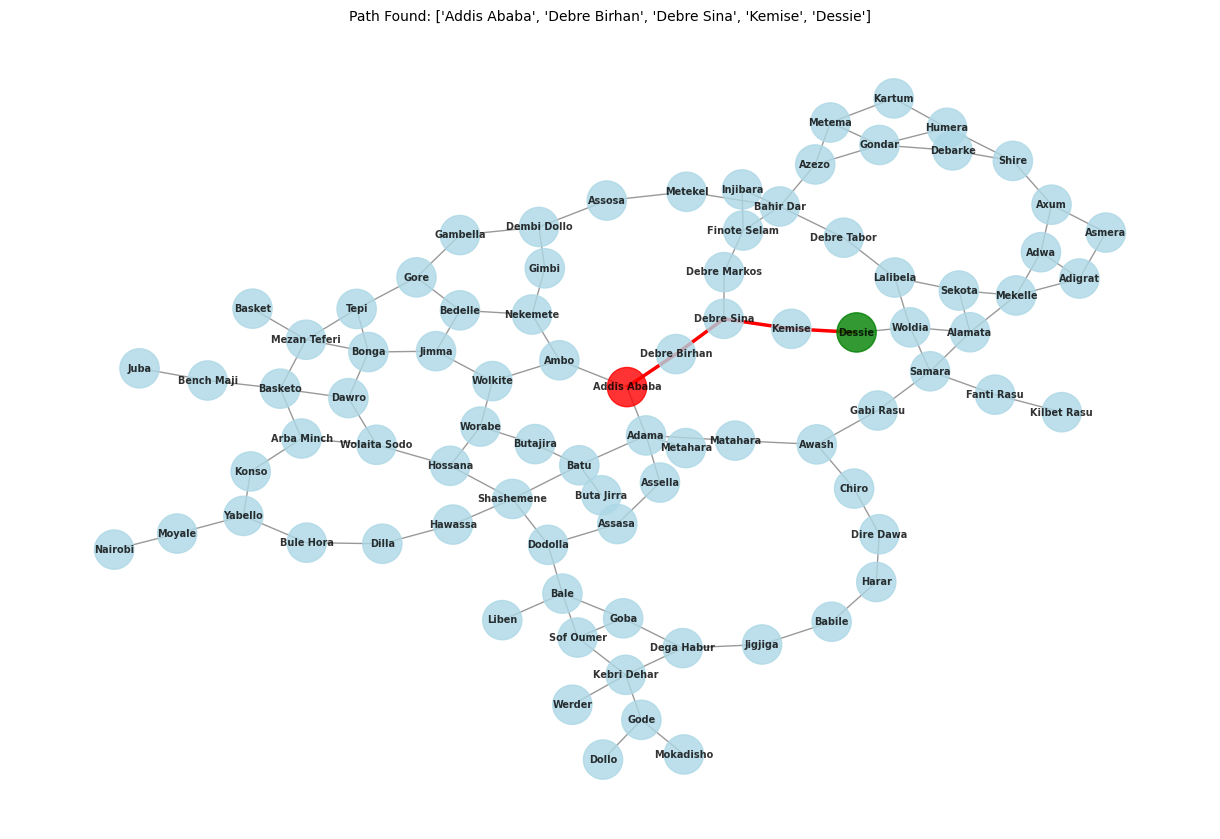

In [68]:
draw_path = GraphVisualizer(ethiopia_graph, "Addis Ababa", "Dessie", path_bfs)
draw_path.draw_graph_with_path()

In [42]:
search_dfs = EthiopiaSearch(ethiopia_graph, "Addis Ababa", "Dessie", "DFS")
path_dfs = search_dfs.search()
print("DFS Path:", path_dfs)

DFS Path: ['Addis Ababa', 'Adama', 'Batu', 'Shashemene', 'Hossana', 'Wolaita Sodo', 'Dawro', 'Bonga', 'Jimma', 'Bedelle', 'Gore', 'Gambella', 'Dembi Dollo', 'Assosa', 'Metekel', 'Bahir Dar', 'Azezo', 'Metema', 'Kartum', 'Humera', 'Shire', 'Axum', 'Adwa', 'Adigrat', 'Mekelle', 'Sekota', 'Lalibela', 'Woldia', 'Dessie']


## Visualize the graph for DFS

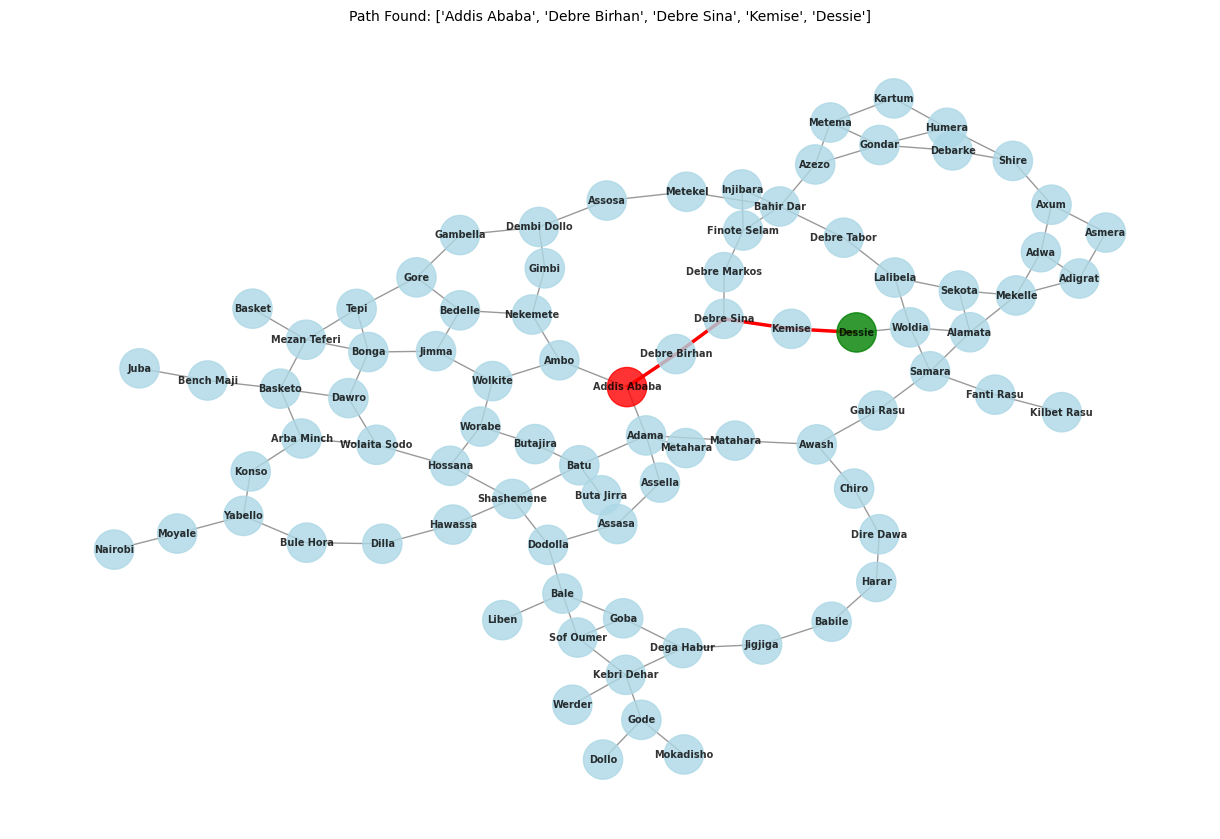

In [69]:
draw_path = GraphVisualizer(ethiopia_graph, "Addis Ababa", "Dessie", path_bfs)
draw_path.draw_graph_with_path()

# Q-2 Uniform cost search

In [70]:
graph_with_cost = {
    "Asmara": {"Axum": 5, "Adigrat": 6},
    "Axum": {"Asmara": 5, "Shire": 2, "Adwa": 1},
    "Adigrat": {"Asmara": 6, "Adwa": 4, "Mekelle": 4},
    "Adwa": {"Axum": 1, "Adigrat": 4, "Mekelle": 7},
    "Mekelle": {"Adigrat": 4, "Adwa": 7, "Alamata": 5, "Sekota":9},
    "Sekota": {"Mekelle": 9, "Alamata": 6, "Lalibela": 6},
    "Lalibela": {"Sekota": 6, "Woldia": 7, "Debre Tabor": 8},
    "Alamata": {"Mekelle": 5, "Sekota": 6, "Woldia": 3, "Samara": 11},
    "Woldia": {"Lalibela": 7, "Dessie": 6, "Alamata": 3, "Samara": 8},
    "Dessie": {"Woldia": 6, "Kemise": 4},
    "Kemise": {"Dessie": 4, "Debre Sina": 6},
    "Debre Sina": {"Kemise": 6, "Debre Birhan": 2, "Debre Markos": 17},
    "Debre Birhan": {"Debre Sina": 2, "Addis Ababa": 5},
    "Samara": {"Alamata": 11, "Woldia": 8, "Fanti Rasu": 7, "Gabi Rasu": 9},
    "Fanti Rasu": {"Samara": 7, "Killbet Rasu": 6},
    "Gabi Rasu": {"Samara": 9, "Awash": 5},
    "Killbet Rasu": {"Fanti Rasu": 6},
    "Shire": {"Axum": 2, "Humera": 8, "Debark": 7},
    "Humera": {"Shire": 8, "Gondar": 9, "Khartoum": 21},
    "Debark": {"Shire": 7, "Gondar": 4},
    "Gondar": {"Debark": 4, "Humera": 9, "Azezo": 1, "Metema": 7},
    "Metema": {"Azezo": 7, "Gondar": 7, "Khartoum": 19},
    "Azezo": {"Gondar": 1, "Metema": 7, "Bahir Dar": 7},
    "Khartoum": {"Humera": 21, "Metema": 19},
    "Bahir Dar": {"Azezo": 7, "Debre Tabor": 4, "Finote Selam": 6, "Injibara": 4, "Metekel": 11},
    "Debre Tabor": {"Bahir Dar": 4, "Lalibela": 8},
    "Debre Markos": {"Finote Selam": 3, "Debre Sina": 17},
    "Finote Selam": {"Bahir Dar": 6, "Debre Markos": 3, "Injibara": 2},
    "Injibara": {"Bahir Dar": 4, "Finote Selam": 2},
    "Metekel": {"Bahir Dar": 11},
    "Addis Ababa": {"Debre Birhan": 5, "Ambo": 5, "Adama": 3},
    "Adama": {"Addis Ababa": 3, "Matahara": 3, "Assela": 4, "Batu": 4},
    "Ambo": {"Addis Ababa": 5, "Wolkite": 6, "Nekemte": 9},
    "Nekemte": {"Ambo": 9, "Gimbi": 4, "Bedelle": 2},
    "Gimbi": {"Nekemte": 4, "Dembi Dolo": 6},
    "Bedelle": {"Nekemte": 2, "Gore": 6, "Jimma": 7},
    "Gore": {"Bedelle": 6, "Gambela": 5, "Tepi": 9},
    "Dembi Dolo": {"Gimbi": 6, "Assosa": 12, "Gambela": 4},
    "Assosa": {"Dembi Dolo": 12},
    "Gambela": {"Dembi Dolo": 4, "Gore": 5},
    "Wolkite": {"Ambo": 6, "Jimma": 8, "Worabe": 5},
    "Jimma": {"Bedelle": 7, "Wolkite": 8, "Bonga": 4},
    "Bonga": {"Jimma": 4, "Tepi": 8, "Dawro": 10, "Mizan Teferi": 4},
    "Tepi": {"Gore": 9, "Mizan Teferi": 4, "Bonga": 8},
    "Mizan Teferi": {"Tepi": 4, "Bonga": 4},
    "Buta Jira": {"Worabe": 2, "Batu": 2},
    "Batu": {"Buta Jira": 2, "Adama": 4, "Shashemene": 3},
    "Worabe": {"Buta Jira": 2, "Wolkite": 5, "Hossana": 2},
    "Shashemene": {"Batu": 3, "Hawassa": 1, "Dodolla": 3, "Hossana": 7},
    "Hossana": {"Worabe": 2, "Shashemene": 7, "Wolaita Sodo": 4},
    "Wolaita Sodo": {"Dawro": 6, "Hossana": 4, "Arba Minch": 5},
    "Dawro": {"Wolaita Sodo": 6, "Bonga": 10},
    "Arba Minch": {"Wolaita Sodo": 5, "Basketo": 10, "Konso": 4},
    "Basketo": {"Arba Minch": 10, "Bench Maji": 5},
    "Bench Maji": {"Basketo": 5, "Juba": 22},
    "Juba": {"Bench Maji": 22},
    "Hawassa": {"Shashemene": 1, "Dilla": 3},
    "Dilla": {"Hawassa": 3, "Bule Hora": 4},
    "Bule Hora": {"Dilla": 4, "Yabello": 3},
    "Yabello": {"Bule Hora": 3, "Konso": 3, "Moyale": 6},
    "Konso": {"Arba Minch": 4, "Yabello": 3},
    "Moyale": {"Yabello": 6, "Nairobi": 22},
    "Nairobi": {"Moyale": 22},
    "Assela": {"Adama": 4, "Assasa": 4},
    "Assasa": {"Assela": 4, "Dodolla": 1},
    "Dodolla": {"Assasa": 1, "Shashemene": 3, "Bale": 13},
    "Bale": {"Dodolla": 13, "Goba": 18, "Liben": 11, "Sof Oumer": 23},
    "Liben": {"Bale": 11},
    "Goba": {"Bale": 18, "Sof Oumer": 6, "Babille": 28},
    "Sof Oumer": {"Goba": 6, "Bale": 23, "Gode": 23},
    "Matahara": {"Adama": 3, "Awash": 1},
    "Awash": {"Matahara": 1, "Gabi Rasu": 5, "Chiro": 4},
    "Chiro": {"Awash": 4, "Dire Dawa": 8},
    "Dire Dawa": {"Chiro": 8, "Harar": 4},
    "Harar": {"Dire Dawa": 4, "Babille": 2},
    "Babille": {"Harar": 2, "Jigjiga": 3, "Goba": 28},
    "Jigjiga": {"Babille": 3, "Dega Habur": 5},
    "Dega Habur": {"Jigjiga": 5, "Kebri Dahar": 6},
    "Kebri Dahar": {"Dega Habur": 6, "Gode": 5, "Werder": 6},
    "Werder": {"Kebri Dahar": 6},
    "Gode": {"Kebri Dahar": 5, "Dollo": 17, "Mokadisho": 22, "Sof Oumer": 23},
    "Dollo": {"Gode": 17},
    "Mokadisho": {"Gode": 22},
}

In [72]:
import heapq

def uniform_cost_search(graph, start, goal):
    print("Uniform Cost Search:")
    
    priority_queue = [(0, start, [])]
    visited = {}

    while priority_queue:
        cost, node, path = heapq.heappop(priority_queue)

        if node in visited and visited[node] <= cost:
            continue
        
        visited[node] = cost
        path = path + [node]

        print(f"Visited {node} with cost {cost}")

        if node == goal:
            print(f"Reached goal {goal} with cost {cost}\n")
            return path, cost  

        for neighbor, edge_cost in graph.get(node, {}).items():
            if neighbor not in visited or cost + edge_cost < visited[neighbor]:
                heapq.heappush(priority_queue, (cost + edge_cost, neighbor, path))

    print(f"Goal {goal} not reachable.\n")
    return None, float('inf') 

Uniform Cost Search:
Visited Addis Ababa with cost 0
Visited Adama with cost 3
Visited Ambo with cost 5
Visited Debre Birhan with cost 5
Visited Matahara with cost 6
Visited Assela with cost 7
Visited Awash with cost 7
Visited Batu with cost 7
Visited Debre Sina with cost 7
Visited Buta Jira with cost 9
Visited Shashemene with cost 10
Visited Assasa with cost 11
Visited Chiro with cost 11
Visited Hawassa with cost 11
Visited Wolkite with cost 11
Visited Worabe with cost 11
Visited Dodolla with cost 12
Visited Gabi Rasu with cost 12
Visited Hossana with cost 13
Visited Kemise with cost 13
Visited Dilla with cost 14
Visited Nekemte with cost 14
Visited Bedelle with cost 16
Visited Dessie with cost 17
Visited Wolaita Sodo with cost 17
Visited Bule Hora with cost 18
Visited Gimbi with cost 18
Visited Dire Dawa with cost 19
Visited Jimma with cost 19
Visited Samara with cost 21
Visited Yabello with cost 21
Visited Arba Minch with cost 22
Visited Gore with cost 22
Visited Bonga with cost 23


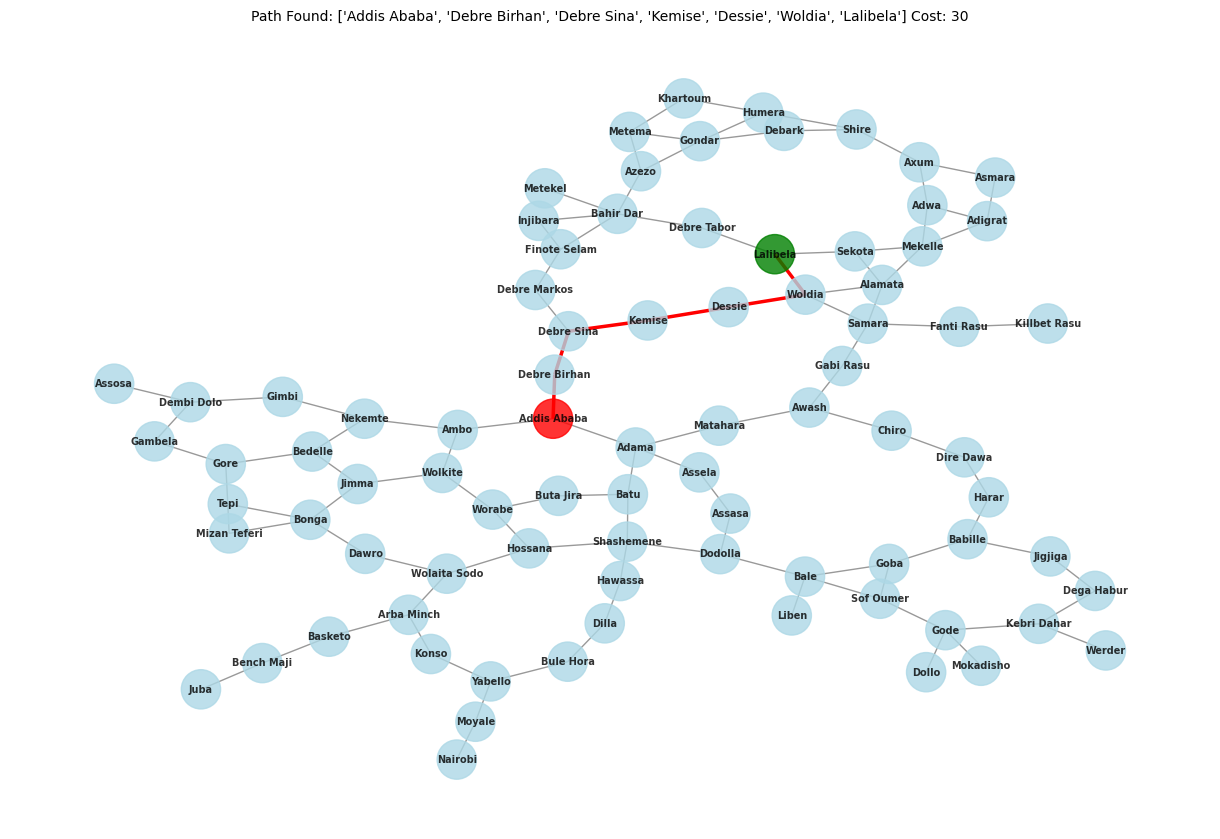

In [75]:
start_node = "Addis Ababa"
goal_node = "Lalibela"
path, total_cost = uniform_cost_search(graph_with_cost, start_node, goal_node)

if path:
    print(f"Shortest path: {' -> '.join(path)} with total cost: {total_cost}")
    draw_path_ucs = GraphVisualizer(graph_with_cost, "Addis Ababa", "Lalibela", path,cost=total_cost)
    draw_path_ucs.draw_graph_with_path()
    
else:
    print("No path found.")

In [77]:
import heapq

def ucs_multiple_goals(graph, start, goal_states):
    frontier = []
    heapq.heappush(frontier, (0, start, [])) 
    
   
    explored = {}
    
   
    visited_goals = set()
    
    while frontier:
        cost, node, path = heapq.heappop(frontier)
        
        
        path = path + [node]
        
       
        if node in goal_states and node not in visited_goals:
            visited_goals.add(node)
        
        if visited_goals == set(goal_states):
            return path
        
      
        for neighbor, travel_cost in graph.get(node, {}).items():
            new_cost = cost + travel_cost
            if neighbor not in explored or new_cost < explored[neighbor]:
                explored[neighbor] = new_cost
                heapq.heappush(frontier, (new_cost, neighbor, path))
    
    return None  

Optimal path: None


In [80]:
goal_states = ["Axum", "Gondar", "Lalibela","Babile","Jimma","Bale","Sof Oumer","Arba Minch"]
start = "Addis Ababa"
path = ucs_multiple_goals(graph_with_cost, start, goal_states)
print("Optimal path:", path)

Optimal path: None


# Q-3 A* search

In [79]:
graph_three = {
    "Asmara": {"Axum": 5, "Adigrat": 6},
    "Axum": {"Asmara": 5, "Shire": 2, "Adwa": 1},
    "Adigrat": {"Asmara": 6, "Adwa": 4, "Mekelle": 4},
    "Adwa": {"Axum": 1, "Adigrat": 4, "Mekelle": 7},
    "Mekelle": {"Adigrat": 4, "Adwa": 7, "Alamata": 5, "Sekota":9},
    "Sekota": {"Mekelle": 9, "Alamata": 6, "Lalibela": 6},
    "Lalibela": {"Sekota": 6, "Woldia": 7, "Debre Tabor": 8},
    "Alamata": {"Mekelle": 5, "Sekota": 6, "Woldia": 3, "Samara": 11},
    "Woldia": {"Lalibela": 7, "Dessie": 6, "Alamata": 3, "Samara": 8},
    "Dessie": {"Woldia": 6, "Kemise": 4},
    "Kemise": {"Dessie": 4, "Debre Sina": 6},
    "Debre Sina": {"Kemise": 6, "Debre Birhan": 2, "Debre Markos": 17},
    "Debre Birhan": {"Debre Sina": 2, "Addis Ababa": 5},
    "Samara": {"Alamata": 11, "Woldia": 8, "Fanti Rasu": 7, "Gabi Rasu": 9},
    "Fanti Rasu": {"Samara": 7, "Killbet Rasu": 6},
    "Gabi Rasu": {"Samara": 9, "Awash": 5},
    "Killbet Rasu": {"Fanti Rasu": 6},
    "Shire": {"Axum": 2, "Humera": 8, "Debark": 7},
    "Humera": {"Shire": 8, "Gondar": 9, "Khartoum": 21},
    "Debark": {"Shire": 7, "Gondar": 4},
    "Gondar": {"Debark": 4, "Humera": 9, "Azezo": 1, "Metema": 7},
    "Metema": {"Azezo": 7, "Gondar": 7, "Khartoum": 19},
    "Azezo": {"Gondar": 1, "Metema": 7, "Bahir Dar": 7},
    "Khartoum": {"Humera": 21, "Metema": 19},
    "Bahir Dar": {"Azezo": 7, "Debre Tabor": 4, "Finote Selam": 6, "Injibara": 4, "Metekel": 11},
    "Debre Tabor": {"Bahir Dar": 4, "Lalibela": 8},
    "Debre Markos": {"Finote Selam": 3, "Debre Sina": 17},
    "Finote Selam": {"Bahir Dar": 6, "Debre Markos": 3, "Injibara": 2},
    "Injibara": {"Bahir Dar": 4, "Finote Selam": 2},
    "Metekel": {"Bahir Dar": 11},
    "Addis Ababa": {"Debre Birhan": 5, "Ambo": 5, "Adama": 3},
    "Adama": {"Addis Ababa": 3, "Matahara": 3, "Assela": 4, "Batu": 4},
    "Ambo": {"Addis Ababa": 5, "Wolkite": 6, "Nekemte": 9},
    "Nekemte": {"Ambo": 9, "Gimbi": 4, "Bedelle": 2},
    "Gimbi": {"Nekemte": 4, "Dembi Dolo": 6},
    "Bedelle": {"Nekemte": 2, "Gore": 6, "Jimma": 7},
    "Gore": {"Bedelle": 6, "Gambela": 5, "Tepi": 9},
    "Dembi Dolo": {"Gimbi": 6, "Assosa": 12, "Gambela": 4},
    "Assosa": {"Dembi Dolo": 12},
    "Gambela": {"Dembi Dolo": 4, "Gore": 5},
    "Wolkite": {"Ambo": 6, "Jimma": 8, "Worabe": 5},
    "Jimma": {"Bedelle": 7, "Wolkite": 8, "Bonga": 4},
    "Bonga": {"Jimma": 4, "Tepi": 8, "Dawro": 10, "Mizan Teferi": 4},
    "Tepi": {"Gore": 9, "Mizan Teferi": 4, "Bonga": 8},
    "Mizan Teferi": {"Tepi": 4, "Bonga": 4},
    "Buta Jira": {"Worabe": 2, "Batu": 2},
    "Batu": {"Buta Jira": 2, "Adama": 4, "Shashemene": 3},
    "Worabe": {"Buta Jira": 2, "Wolkite": 5, "Hossana": 2},
    "Shashemene": {"Batu": 3, "Hawassa": 1, "Dodolla": 3, "Hossana": 7},
    "Hossana": {"Worabe": 2, "Shashemene": 7, "Wolaita Sodo": 4},
    "Wolaita Sodo": {"Dawro": 6, "Hossana": 4, "Arba Minch": 4},
    "Dawro": {"Wolaita Sodo": 6, "Bonga": 10},
    "Arba Minch": {"Wolaita Sodo": 4, "Basketo": 10, "Konso": 4},
    "Basketo": {"Arba Minch": 10, "Bench Maji": 5},
    "Bench Maji": {"Basketo": 5, "Juba": 22},
    "Juba": {"Bench Maji": 22},
    "Hawassa": {"Shashemene": 1, "Dilla": 3},
    "Dilla": {"Hawassa": 3, "Bule Hora": 4},
    "Bule Hora": {"Dilla": 4, "Yabello": 2},
    "Yabello": {"Bule Hora": 2, "Konso": 3, "Moyale": 6},
    "Konso": {"Arba Minch": 4, "Yabello": 3},
    "Nairobi": {"Moyale": 22},
    "Assela": {"Adama": 4, "Assasa": 4},
    "Assasa": {"Assela": 4, "Dodolla": 1},
    "Dodolla": {"Assasa": 1, "Shashemene": 3, "Robe": 13},
    "Robe": {"Dodolla": 13, "Goba": 18, "Liben": 11, "Sof Oumer": 23},
    "Liben": {"Robe": 11, "Moyale": 11},
    "Goba": {"Robe": 18, "Sof Oumer": 6, "Babille": 28},
    "Sof Oumer": {"Goba": 6, "Robe": 23, "Gode": 23},
    "Matahara": {"Adama": 3, "Awash": 1},
    "Awash": {"Matahara": 1, "Gabi Rasu": 5, "Chiro": 4},
    "Chiro": {"Awash": 4, "Dire Dawa": 8},
    "Dire Dawa": {"Chiro": 8, "Harar": 4},
    "Harar": {"Dire Dawa": 4, "Babille": 2},
    "Babille": {"Harar": 2, "Jigjiga": 3, "Goba": 28},
    "Jigjiga": {"Babille": 3, "Dega Habur": 5},
    "Dega Habur": {"Jigjiga": 5, "Kebri Dahar": 6},
    "Kebri Dahar": {"Dega Habur": 6, "Gode": 5, "Werder": 6},
    "Werder": {"Kebri Dahar": 6},
    "Gode": {"Kebri Dahar": 5, "Dollo": 17, "Mokadisho": 22, "Sof Oumer": 23},
    "Dollo": {"Gode": 17, "Moyale": 18},
    "Mokadisho": {"Gode": 22 , "Moyale": 40},
    "Moyale": {"Yabello": 6, "Nairobi": 22, "Dollo": 18, "Mokadisho": 40, "Liben": 11},

}

heuristic = {
    "Asmara": 68,
    "Axum": 66,
    "Adigrat": 62,
    "Adwa": 65,
    "Mekelle": 58,
    "Sekota": 59,
    "Lalibela": 57,
    "Alamata": 53,
    "Woldia": 50,
    "Dessie": 44,
    "Kemise": 40,
    "Debre Sina": 33,
    "Debre Birhan": 31,
    "Samara": 42,
    "Fanti Rasu": 49,
    "Gabi Rasu": 32,
    "Killbet Rasu": 55,
    "Shire": 67,
    "Humera": 65,
    "Debark": 60,
    "Gondar": 56,
    "Metema": 62,
    "Azezo": 55,
    "Khartoum": 81,
    "Bahir Dar": 48,
    "Debre Tabor": 52,
    "Debre Markos": 39,
    "Finote Selam": 42,
    "Injibara": 44,
    "Metekel": 59,
    "Addis Ababa": 26,
    "Adama": 23,
    "Ambo": 31,
    "Nekemte": 39,
    "Gimbi": 43,
    "Bedelle": 40,
    "Gore": 46,
    "Dembi Dolo": 49,
    "Assosa": 51,
    "Gambela": 51,
    "Wolkite": 25,
    "Jimma": 33,
    "Bonga": 33,
    "Tepi": 41,
    "Mizan Teferi": 37,
    "Buta Jira": 21,
    "Batu": 19,
    "Worabe": 22,
    "Shashemene": 16,
    "Hossana": 21,
    "Wolaita Sodo": 17,
    "Dawro": 23,
    "Arba Minch": 13,
    "Basketo": 23,
    "Bench Maji": 28,
    "Juba": 50,
    "Hawassa": 15,
    "Dilla": 12,
    "Bule Hora": 8,
    "Yabello": 6,
    "Konso": 9,
    "Nairobi": 22,
    "Assela": 22,
    "Assasa": 18,
    "Dodolla": 19,
    "Robe": 22,
    "Liben": 11,
    "Goba": 40,
    "Sof Oumer": 45,
    "Matahara": 26,
    "Awash": 27,
    "Chiro": 31,
    "Dire Dawa": 31,
    "Harar": 35,
    "Babille": 37,
    "Jigjiga": 40,
    "Dega Habur": 45,
    "Kebri Dahar": 40,
    "Werder": 46,
    "Gode": 35,
    "Dollo": 18,
    "Mokadisho": 40,
    "Moyale": 0
}

In [82]:
import heapq

class AStarSearch:
    def __init__(self, graph, heuristic):
        self.graph = graph
        self.heuristic = heuristic

    def search(self, start, goal):
        print("A* Search:")
        visited = set()
        priority_queue = [(self.heuristic[start], 0, start, [])]  
        
        while priority_queue:
            f_cost, g_cost, node, path = heapq.heappop(priority_queue)
            if node in visited:
                continue
            visited.add(node)
            new_path = path + [node]
            print(f"Visited {node} with f_cost {f_cost} and g_cost {g_cost}")
            
            if node == goal:
                print(f"Reached goal {goal} with total cost {g_cost}")
                return new_path, g_cost
            
            for neighbor, edge_cost in self.graph[node].items():
                if neighbor not in visited:
                    new_g_cost = g_cost + edge_cost
                    new_f_cost = new_g_cost + self.heuristic[neighbor]
                    heapq.heappush(priority_queue, (new_f_cost, new_g_cost, neighbor, new_path))
        
        print(f"Goal {goal} not reachable.")
        return None, float('inf')

In [83]:
astar = AStarSearch(graph_three, heuristic)
path_astar, cost_astar = astar.search("Addis Ababa", "Moyale")
print(f"Path: {path_astar}, Cost: {cost_astar}")

A* Search:
Visited Addis Ababa with f_cost 26 and g_cost 0
Visited Adama with f_cost 26 and g_cost 3
Visited Batu with f_cost 26 and g_cost 7
Visited Shashemene with f_cost 26 and g_cost 10
Visited Hawassa with f_cost 26 and g_cost 11
Visited Dilla with f_cost 26 and g_cost 14
Visited Bule Hora with f_cost 26 and g_cost 18
Visited Yabello with f_cost 26 and g_cost 20
Visited Moyale with f_cost 26 and g_cost 26
Reached goal Moyale with total cost 26
Path: ['Addis Ababa', 'Adama', 'Batu', 'Shashemene', 'Hawassa', 'Dilla', 'Bule Hora', 'Yabello', 'Moyale'], Cost: 26


# Q-4 MiniMax

In [85]:
graph_four = {
    "Addis Ababa": ["Ambo", "Adama", "Buta Jirra"],
    "Ambo": ["Addis Ababa", "Gedo", "Nekemte"],
    "Buta Jirra": ["Addis Ababa", "Worabe", "Wolkite"],
    "Adama": ["Addis Ababa", "Mojo", "Diredawa"],
    "Diredawa":["Adama","Harar","Chiro"],
    "Mojo": ["Adama","Kaffa","Dilla"],
    "Wolkite":["Tepi","Buta Jirra","Bench Naji"],
    "Worabe":["Buta Jirra","Hossana","Durame"],
    "Gedo": ["Ambo","Fincha","Shamba"],
    "Nekemte" :["Ambo","Gimbi","Limu"],
    "Gimbi" : ["Nekemte"],
    "Limu": ["Nekemte"],
    "Fincha": ["Gedo"],
    "Shamba":["Gedo"],
    "Tepi":["Wolkite"],
    "Bench Naji":["Wolkite"],
    "Hossana": ["Worabe"],
    "Durame": ["Worabe"],
    "Harar": ["Diredawa"],
    "Chiro":["Diredawa"],
    "Dilla":["Mojo"],
    "Kaffa":["Mojo"],
}

utilities = {
    "Fincha": 5,
    "Shamba": 4,
    "Gimbi": 8,
    "Limu": 8,
    "Hossana": 6,
    "Durame": 5,
    "Bench Naji": 5,
    "Tepi": 6,
    "Kaffa": 7,
    "Dilla":9,
    "Chiro":6,
    "Harar":10
}

In [86]:
class MinimaxSearch:
    def __init__(self, graph, utilities, start_node, adversary_node):
        self.graph = graph
        self.utilities = utilities
        self.start_node = start_node
        self.adversary_node = adversary_node

    def minimax(self, node, depth, maximizing_player, visited=None):
        if visited is None:
            visited = set()

        if depth == 0:
            return self.utilities.get(node, 0)

        visited.add(node)

        if maximizing_player:
            max_utility = float('-inf')
            for neighbor in self.graph.get(node, []):
                if neighbor not in visited:
                    utility = self.minimax(neighbor, depth - 1, False, visited)
                    max_utility = max(max_utility, utility)
            visited.remove(node)
            return max_utility
        else:
            min_utility = float('inf')
            for neighbor in self.graph.get(node, []):
                if neighbor not in visited:
                    utility = self.minimax(neighbor, depth - 1, True, visited)
                    min_utility = min(min_utility, utility)
            visited.remove(node)
            return min_utility

    def find_best_path(self):
        best_utility = float('-inf')
        best_path = []

        def minimax_path(node, path, maximizing_player):
            nonlocal best_utility, best_path

            current_utility = self.utilities.get(node, 0)
            if current_utility > best_utility:
                best_utility = current_utility
                best_path = path.copy()

            for neighbor in self.graph.get(node, []):
                if neighbor not in path: 
                    path.append(neighbor)
                    minimax_path(neighbor, path, not maximizing_player)
                    path.pop()

        minimax_path(self.adversary_node, [self.adversary_node], False)

        return best_path, best_utility

In [88]:
start_node = "Addis Ababa"
adversary_node = "Addis Ababa"


minimax_search = MinimaxSearch(graph_four, utilities, start_node, adversary_node)

best_path, best_utility = minimax_search.find_best_path()

print("Best Path:", best_path)
print("With Utility:", best_utility)

Best Path: ['Addis Ababa', 'Adama', 'Diredawa', 'Harar']
With Utility: 10
